In [1]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("C:/Users/Shrinidhi.V/Downloads/post partum data.csv")

In [3]:
df.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [7]:
df.columns

Index(['Timestamp', 'Age', 'Feeling sad or Tearful',
       'Irritable towards baby & partner', 'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')

In [9]:
df["Problems of bonding with baby"].value_counts()

Problems of bonding with baby
No           557
Sometimes    542
Yes          404
Name: count, dtype: int64

In [11]:
df["Suicide attempt"].value_counts()

Suicide attempt
No                       709
Yes                      459
Not interested to say    335
Name: count, dtype: int64

In [13]:
df.isna().sum()

Timestamp                                     0
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [15]:
df.describe()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
count,1503,1503,1503,1497,1503,1491,1503,1503,1494,1503,1503
unique,90,5,3,3,3,3,3,2,3,3,3
top,6/15/2022 22:24,40-45,Yes,Yes,Two or more days a week,No,No,Yes,No,No,No
freq,51,364,536,555,640,583,841,980,624,557,709


In [25]:
df[" Problems concentrating or making decision "] = df["Problems concentrating or making decision"].fillna(df["Problems concentrating or making decision"].mode()[0])

In [27]:
df["Problems concentrating or making decision"].isna().sum()

0

In [29]:
# encoding categorical variable 
Le= LabelEncoder()
for column in df.columns:
    df[column]=Le.fit_transform(df[column].astype(str))

In [31]:
df["Suicide attempt"].value_counts()


Suicide attempt
0    709
2    459
1    335
Name: count, dtype: int64

In [33]:
X = df.drop("Suicide attempt" , axis = 1)
y = df["Suicide attempt"]

In [35]:
X_train, X_test , y_train , y_test = train_test_split (X, y , test_size = 0.3, random_state = 42)

In [37]:
# train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

In [43]:
accuracy = accuracy_score(y_test , y_pred)
accuracy

0.9645232815964523

In [45]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[204,   0,   4],
       [  2,  90,   6],
       [  4,   0, 141]], dtype=int64)

In [47]:
import seaborn as sns 
import matplotlib.pyplot as plt 

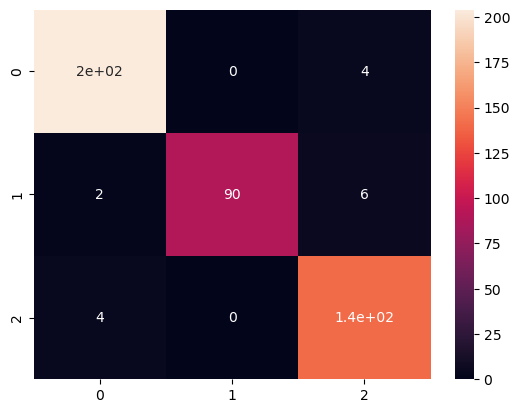

In [49]:
sns.heatmap(cm, annot = True)
plt.show()

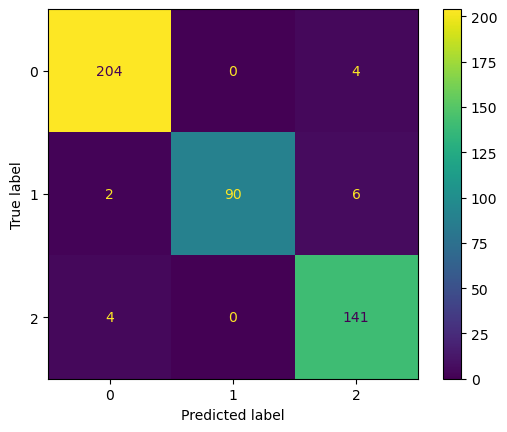

In [51]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
Display = metrics.ConfusionMatrixDisplay(cm, display_labels=model.classes_)
Display.plot()

In [53]:
df["Suicide attempt"].value_counts()


Suicide attempt
0    709
2    459
1    335
Name: count, dtype: int64

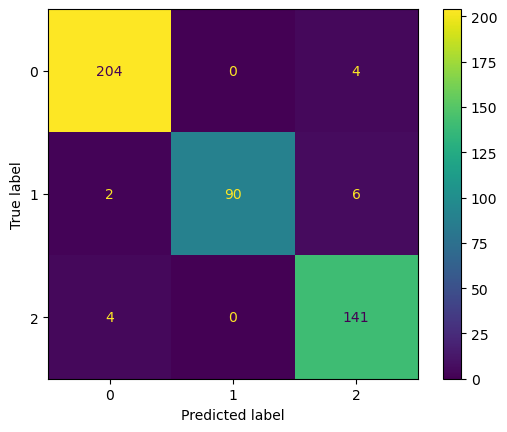

In [55]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
Display = metrics.ConfusionMatrixDisplay(cm)
Display.plot()